In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
X = np.abs(6 * np.random.rand(200, 1) - 3)
y =  (5 * X**2) + np.random.randn(200, 1) * 3

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Sklearn Ridge Regression

In [27]:
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)
y_pred1 = ridge.predict(X_test)
print('MSE : ',mean_squared_error(y_test,y_pred1))
print('R2_Score : ',r2_score(y_test,y_pred1))

MSE :  19.63390436173998
R2_Score :  0.9005157210784032


In [28]:
ridge.coef_, ridge.intercept_

(array([[14.61214132]]), array([-6.89127814]))

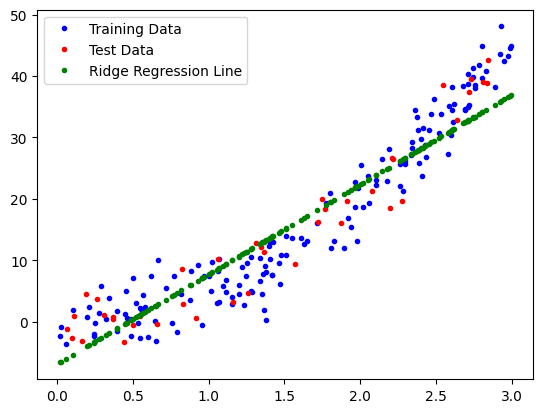

In [29]:
plt.plot(X_train,y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.plot(X_train,ridge.predict(X_train),'g.',label='Ridge Regression Line')
plt.legend()
plt.show()

# Ridge Regression from Scratch

In [36]:
class TaraRidge:
  def __init__(self,alpha=5):
    self.alpha = alpha
    self.intercept_ = None
    self.coef_ = None

  def fit(self,X_train,y_train):

    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
      den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

    self.coef_ = num/(den + self.alpha)
    self.intercept_ = y_train.mean() - (self.coef_ * X_train.mean())

  def predict(self,X_test):
    return (self.coef_ * np.array(X_test)) + self.intercept_


In [38]:
t_ridge = TaraRidge(alpha=10)
t_ridge.fit(X_train,y_train)
y_pred2 = t_ridge.predict(X_test)

print('MSE : ',mean_squared_error(y_test,y_pred2))
print('R2_Score : ',r2_score(y_test,y_pred2))

MSE :  19.63390436173999
R2_Score :  0.9005157210784032


In [39]:
t_ridge.coef_, t_ridge.intercept_

(array([14.61214132]), array([-6.89127814]))

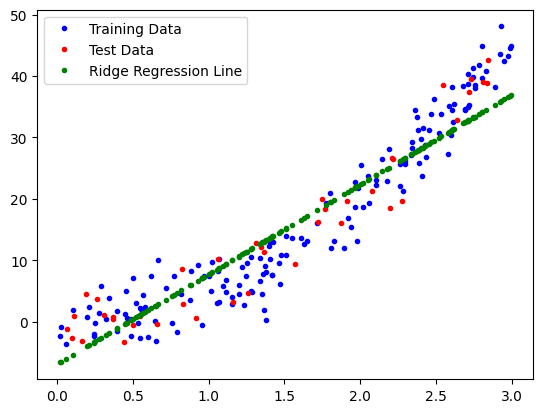

In [40]:
plt.plot(X_train,y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.plot(X_train,t_ridge.predict(X_train),'g.',label='Ridge Regression Line')
plt.legend()
plt.show()